In [596]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [597]:
from src.utils import change_width, format_barplot,annotate_bars

# Table of Contents
 - [Read Data](#Import)
 - [Summary](#Summary)
 - [Explore](#Explore)
 - [Treat Data](#TreatData)
 - [Evaluate Models](#Evaluate)



<a id="Import"></a>
<h1><span style='font-family:Helvetica'> 1. Read Data </h1>
<hr></hr>

In [598]:
dataset = pd.read_csv("input/Social_Network_Ads.csv")

<a id="Summary"></a>
<h1><span style='font-family:Helvetica'> 2. Summary </h1>
<hr></hr>

<h3><span style='font-family:Helvetica'> About the Dataset </h3>
<ul>
 <li><span style='font-family:Helvetica'> Has one categorical feature (<strong>Gender</strong>) and two numeric features (<strong>Age</strong>, <strong>EstimatedSalary</strong>)</li>
 <li><span style='font-family:Helvetica'> Has none <em><strong>NULL</strong></em> values</li>
</ul>



In [599]:
dataset.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [600]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<a id="Explore"></a>
<h1><span style='font-family:Helvetica'> 3. Explore </h1>
<hr></hr>

# Some insights

- [3.1 Purchased](#Purchased)
    - About 36% of visitors has puchased. 
- [3.2 Gender](#Gender)
    - Among those who bought about 54% were women.
    - Among those who did not purchase is almost equal the number of men and women (130, 127 respectively)
- [3.3 Annual Salary](#AnnualSalary)
    - Who purchased has an average annual salary of 86000 USD
    - Who don't purchased has an average annual salary of 60000 USD
- [3.4 Age](#Age)
    - The average age of the buyer was 32 years old
    - Who don't purchased has an average age of 42 years old

<a id="Purchased"></a>
<h2><span style='font-family:Helvetica'> 3.1 Purchased </h2>
 

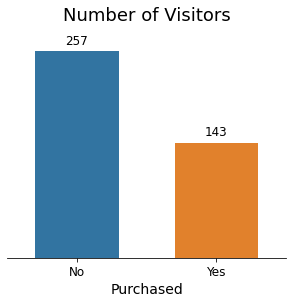

In [601]:
#dataset['Purchased'].value_counts()
fig, ax1 = plt.subplots(figsize=(5,4))
g = sns.countplot(x='Purchased', data=dataset, ax=ax1)

format_barplot('h', 0.6, 'Number of Visitors','Purchased',['No','Yes'], g)
annotate_bars(g)


<a id="Gender"></a>
<h2><span style='font-family:Helvetica'> 3.2 Gender </h2>

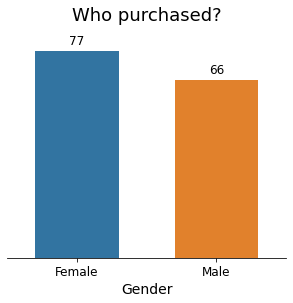

In [602]:
#purchased_by_gender = dataset[dataset['Purchased'] == 1][['Purchased','Gender']].groupby('Gender', as_index=False).count()
fig, ax1 = plt.subplots(figsize=(5,4))
g = sns.countplot(x="Gender", data=dataset[dataset['Purchased']==1], ax=ax1)
format_barplot('h', 0.6, 'Who purchased?','Gender',['Female','Male'], g)
annotate_bars(g)

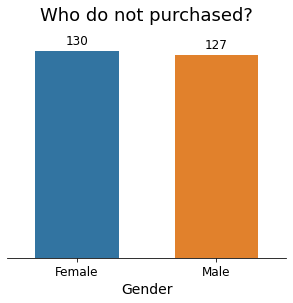

In [603]:
#n_purchased_by_gender = dataset[dataset['Purchased'] == 0][['Purchased','Gender']].groupby('Gender', as_index=False).count()
fig, ax1 = plt.subplots(figsize=(5,4))
g = sns.countplot(x="Gender", data=dataset[dataset['Purchased']==0], ax=ax1)
annotate_bars(g)
format_barplot('h', 0.6, 'Who do not purchased?','Gender',['Female','Male'], g)

<h2><span style='font-family:Helvetica'> Summaryzing </h2>

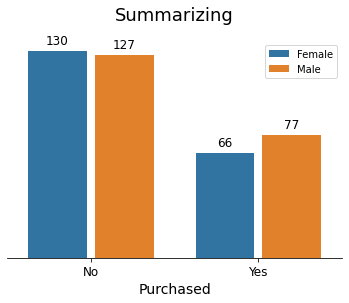

In [604]:
g = sns.countplot(x="Purchased", hue="Gender", data=dataset)
format_barplot('h', 0.35, 'Summarizing','Purchased',['No','Yes'], g)
annotate_bars(g)
g.legend(['Female','Male'])

<a id="AnnualSalary"></a>
<h2><span style='font-family:Helvetica'> 3.3. AnnualSalary </h2>

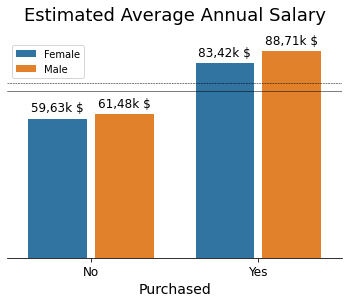

In [605]:
#dataset[['Purchased','EstimatedSalary']].groupby('Purchased', as_index=False).median()
g = sns.barplot(data=dataset, x='Purchased', y='EstimatedSalary', hue="Gender", ci=None)

format_barplot('h', 0.35, 'Estimated Average Annual Salary','Purchased',['No','Yes'], g)
annotate_bars(g, 0.001, 'k $')

g.legend(['Female','Male'])
g.axhline(71525, color='k', linestyle='-', linewidth=0.5)
g.axhline(75095, color='k', linestyle='--', linewidth=0.5)

<a id="Age"></a>
<h2><span style='font-family:Helvetica'> 3.4. Age </h2>

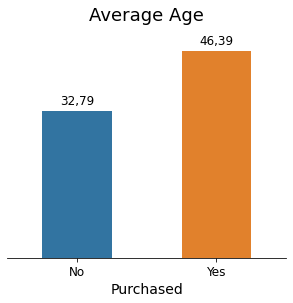

In [606]:
#dataset[['Purchased','Age']].groupby('Purchased', as_index=False).mean()
fig, ax1 = plt.subplots(figsize=(5,4))
g = sns.barplot(data=dataset, x='Purchased', y=dataset['Age'], ci=None)
format_barplot('h', 0.5, 'Average Age','Purchased',['No','Yes'], g)
annotate_bars(g)


<a id="TreatData"></a>
<h2><span style='font-family:Helvetica'> 4. Treat Data </h2>
<hr></hr>

In [607]:
# Convert to numeric
dataset['Gender'] = dataset['Gender'].map({'Female':0, 'Male':1}).astype(int)

In [608]:
dataset.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0


In [609]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import accuracy_score, log_loss, precision_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier, PassiveAggressiveClassifier

In [610]:
classifiers = [
    KNeighborsClassifier(3),
    NearestCentroid(), 
    SVC(probability=True),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    BernoulliNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    SGDClassifier(),
    RidgeClassifier(),
    PassiveAggressiveClassifier()]

In [611]:
features = dataset.drop('Purchased', axis=1)
targets = dataset.pop('Purchased')

In [612]:
X_train, X_test = features.iloc[300:], features.iloc[:300]
y_train, y_test = targets.iloc[300:], targets.iloc[:300]

<a id="Evaluate"></a>
<h2><span style='font-family:Helvetica'> 5. Evaluate models </h2>
<hr></hr>

In [613]:

X_ev = X_train.reset_index(drop=True)
y_ev = y_train.reset_index(drop=True)

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sc = StandardScaler()

acc_dict = {}

for train_index, test_index in sss.split(X_ev, y_ev):
	X_train, y_train  = X_ev.loc[train_index], y_ev.loc[train_index]
	X_test, y_test = X_ev.loc[test_index], y_ev.loc[test_index]

	X_train = sc.fit_transform(X_train)  
	X_test = sc.transform(X_test)

	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc
			
for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)
		
log.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
0,RandomForestClassifier,0.920
0,GaussianNB,0.920
0,GradientBoostingClassifier,0.905
0,QuadraticDiscriminantAnalysis,0.905
0,NuSVC,0.895
0,DecisionTreeClassifier,0.895
0,LinearDiscriminantAnalysis,0.885
0,RidgeClassifier,0.885
0,KNeighborsClassifier,0.875
0,SVC,0.875


In [614]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)  
sc2 = StandardScaler()  
x_train = sc2.fit_transform(x_train)  
x_test = sc2.transform(x_test)

In [615]:
# Build a model
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
# Predict values to test dataset
y_pred = classifier.predict(x_test)  

In [616]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)  
cm  

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [617]:
rs = recall_score(y_test, y_pred)  
rs

0.9545454545454546

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.984


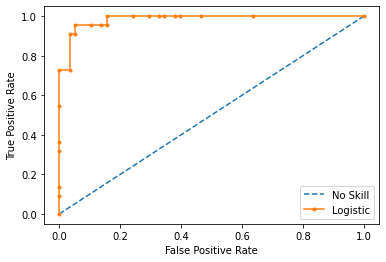

In [618]:
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = classifier.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()